[Refernce](https://medium.com/afritech-blurbs/outliers-and-how-to-handle-them-11c26ebc809c)

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
# creating our dataframe
salaries = pd.DataFrame()
salaries['Names'] = ['King', 'Josh', 'Rachel', 'Greg', 'Judy','Stacie', 'Jenny', 'Michel', 'Jude', 'Monica']
salaries['Salary'] = [20000, 18000, 21000, 150000, 13000, 21450, 500, 15000, 23000, 17500]
salaries['Ages'] = [23, 22, 21, 23, 65, 24, 25, 23, 20, 25]
salaries['City'] = ['Nairobi', 'Nakuru', 'Thika', 'Kisumu', 'Nairobi', 'New Delhi', 'Mombasa', 
                    'Nairobi', 'Nakuru', 'Thika']
print(salaries)

    Names  Salary  Ages       City
0    King   20000    23    Nairobi
1    Josh   18000    22     Nakuru
2  Rachel   21000    21      Thika
3    Greg  150000    23     Kisumu
4    Judy   13000    65    Nairobi
5  Stacie   21450    24  New Delhi
6   Jenny     500    25    Mombasa
7  Michel   15000    23    Nairobi
8    Jude   23000    20     Nakuru
9  Monica   17500    25      Thika


# a. Visualization method

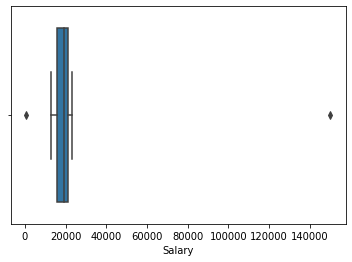

In [2]:
sns.boxplot(x=salaries['Salary'])

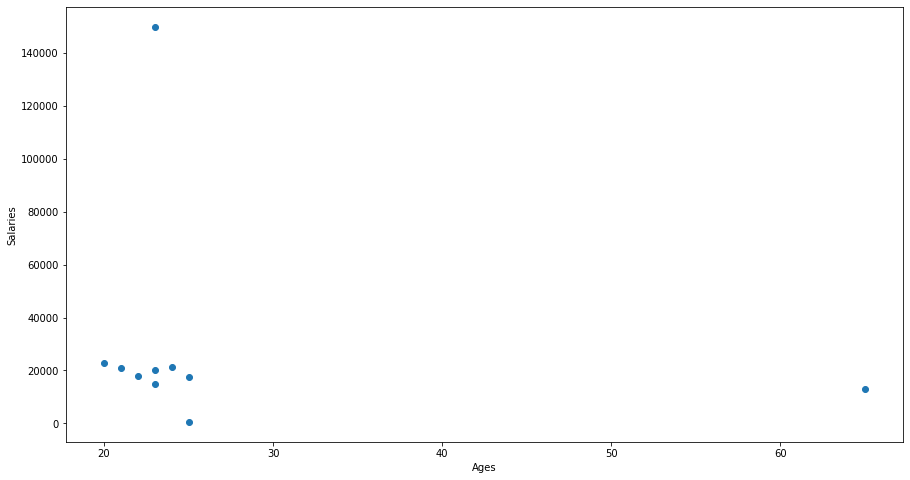

In [3]:
# scatterplot for ages and salaries.
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(salaries['Ages'], salaries['Salary'])
ax.set_xlabel('Ages')
ax.set_ylabel('Salaries')
plt.show()

# b. Z-score method



In [4]:
from sklearn.datasets import load_boston
boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names
# creating the datafrae
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# checking the z-score of the data in the dataset
z = np.abs(stats.zscore(boston_df))
print(z)

         CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0    0.419782  0.284830  1.287909  0.272599  0.144217  0.413672  0.120013   
1    0.417339  0.487722  0.593381  0.272599  0.740262  0.194274  0.367166   
2    0.417342  0.487722  0.593381  0.272599  0.740262  1.282714  0.265812   
3    0.416750  0.487722  1.306878  0.272599  0.835284  1.016303  0.809889   
4    0.412482  0.487722  1.306878  0.272599  0.835284  1.228577  0.511180   
..        ...       ...       ...       ...       ...       ...       ...   
501  0.413229  0.487722  0.115738  0.272599  0.158124  0.439316  0.018673   
502  0.415249  0.487722  0.115738  0.272599  0.158124  0.234548  0.288933   
503  0.413447  0.487722  0.115738  0.272599  0.158124  0.984960  0.797449   
504  0.407764  0.487722  0.115738  0.272599  0.158124  0.725672  0.736996   
505  0.415000  0.487722  0.115738  0.272599  0.158124  0.362767  0.434732   

          DIS       RAD       TAX   PTRATIO         B     LSTAT  
0    0.14

In [6]:
# filtering using a threshold of 3
print(np.where(z > 3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

# c. IQR method

IQR = Q3 - Q1


In [7]:
# calculating IQR
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


In [8]:
((boston_df < (Q1 - 1.5 * IQR)) | (boston_df > (Q3 + 1.5 * IQR))).head(30)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


# Handling outliers
## Dropping them


In [9]:
boston_df_cleaned = boston_df[(z < 3).all(axis=1)]
print('Original dataset shape', boston_df.shape)
print("Dataset without outliers' shape", boston_df_cleaned.shape)

Original dataset shape (506, 13)
Dataset without outliers' shape (415, 13)


### removing outliers using IQR score


In [10]:
boston_df_cleaned_out = boston_df[~((boston_df < (Q1 - 1.5 * IQR)) | (boston_df > (Q3 + 1.5 * IQR)).any(axis=1))]

In [11]:
boston_df_cleaned_out

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


## 2. Marking the Outliers



In [12]:
salaries['Outlier'] = np.where(salaries['Salary'] < 30000, 0, 1)
salaries

,Names,Salary,Ages,City,Outlier
0,King,20000,23,Nairobi,0
1,Josh,18000,22,Nakuru,0
2,Rachel,21000,21,Thika,0
3,Greg,150000,23,Kisumu,1
4,Judy,13000,65,Nairobi,0
5,Stacie,21450,24,New Delhi,0
6,Jenny,500,25,Mombasa,0
7,Michel,15000,23,Nairobi,0
8,Jude,23000,20,Nakuru,0
9,Monica,17500,25,Thika,0


## 3.Rescaling the data



In [13]:
salaries['Log of Salaries'] = [np.log(x) for x in salaries['Salary']]
salaries

,Names,Salary,Ages,City,Outlier,Log of Salaries
0,King,20000,23,Nairobi,0,9.903488
1,Josh,18000,22,Nakuru,0,9.798127
2,Rachel,21000,21,Thika,0,9.952278
3,Greg,150000,23,Kisumu,1,11.918391
4,Judy,13000,65,Nairobi,0,9.472705
5,Stacie,21450,24,New Delhi,0,9.973480
6,Jenny,500,25,Mombasa,0,6.214608
7,Michel,15000,23,Nairobi,0,9.615805
8,Jude,23000,20,Nakuru,0,10.043249
9,Monica,17500,25,Thika,0,9.769956
